# __Bitcoin and Ethereum Analysis__

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data
data = yf.download('BTC-USD ETH-USD', start='2020-01-01', end='2025-01-01')
data

[*********************100%***********************]  2 of 2 completed


Price              Close                       High               \
Ticker           BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2020-01-01   7200.174316   130.802002   7254.330566   132.835358   
2020-01-02   6985.470215   127.410179   7212.155273   130.820038   
2020-01-03   7344.884277   134.171707   7413.715332   134.554016   
2020-01-04   7410.656738   135.069366   7427.385742   136.052719   
2020-01-05   7411.317383   136.276779   7544.497070   139.410202   
...                  ...          ...           ...          ...   
2024-12-27  94164.859375  3328.916992  97294.843750  3436.710693   
2024-12-28  95163.929688  3397.902344  95525.898438  3419.920166   
2024-12-29  93530.226562  3349.513428  95174.875000  3406.648438   
2024-12-30  92643.210938  3356.392578  94903.320312  3428.527344   
2024-12-31  93429.203125  3332.531738  96090.601562  3444.396729   

Price                Low                       Open                    Volume  \
Ticker           BTC-USD      ETH-USD       BTC-USD      ETH-USD      BTC-USD   
Date                                                                            
2020-01-01   7174.944336   129.198288   7194.892090   129.630661  18565664997   
2020-01-02   6935.270020   126.954910   7202.551270   130.820038  20802083465   
2020-01-03   6914.996094   126.490021   6984.428711   127.411263  28111481032   
2020-01-04   7309.514160   133.040558   7345.375488   134.168518  18444271275   
2020-01-05   7400.535645   135.045624   7410.451660   135.072098  19725074095   
...                  ...          ...           ...          ...          ...   
2024-12-27  93310.742188  3302.575684  95704.976562  3331.053711  52419934565   
2024-12-28  94014.289062  3318.033936  94160.187500  3328.774658  24107436185   
2024-12-29  92881.789062  3321.664795  95174.054688  3397.862549  29635885267   
2024-12-30  91317.132812  3298.804443  93527.195312  3349.585938  56188003691   
2024-12-31  91914.031250  3311.412598  92643.250000  3356.394775  43625106843   

Price                    
Ticker          ETH-USD  
Date                     
2020-01-01   7935230330  
2020-01-02   8032709256  
2020-01-03  10476845358  
2020-01-04   7430904515  
2020-01-05   7526675353  
...                 ...  
2024-12-27  24091627403  
2024-12-28  14305648523  
2024-12-29  13440907792  
2024-12-30  26981583962  
2024-12-31  20845452085  

[1827 rows x 10 columns]

<AxesSubplot:title={'center':'BTC vs ETH Historical Prices'}, xlabel='Date', ylabel='USD'>

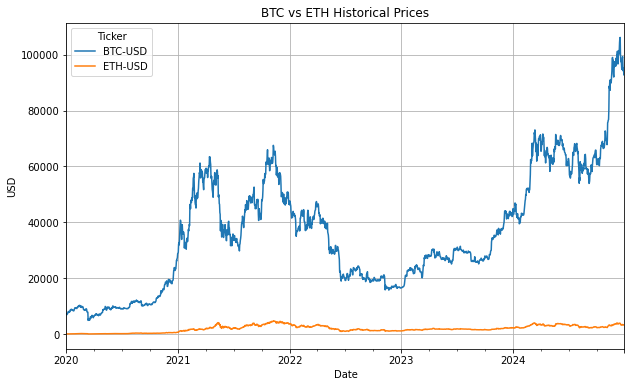

In [12]:
(data
 .Close
 .plot(figsize=(10,6), 
       title='BTC vs ETH Historical Prices', 
       ylabel='USD',
       grid=True)
)

<AxesSubplot:title={'center':'Total Portfolio Value Over Time (BTC + ETH)'}, xlabel='Date', ylabel='Portfolio Value (USD)'>

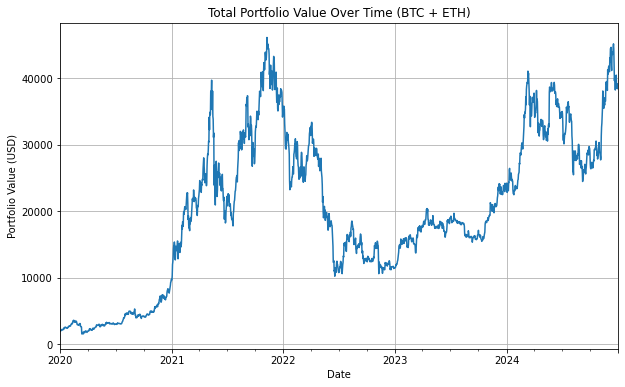

In [33]:
# Assuming a purchase of $1000 of BTC and $1000 of ETH on Jan 1 2020
initial_investment = {'BTC-USD': 1000, 'ETH-USD': 1000}

# Get the price on the first available day
initial_prices = (data
                  .Close
                  .iloc[0])

# Calculate how much of each asset was purchased
holdings = {ticker: initial_investment[ticker] / initial_prices[ticker] for ticker in initial_investment}

# Multiply holdings by price at each date to get daily portfolio value
portfolio_value = data.Close.copy()
for ticker in holdings:
    portfolio_value[ticker] = data.Close[ticker] * holdings[ticker]

# Add total portfolio value column
portfolio_value['Total'] = portfolio_value.sum(axis=1)

# Plot total portfolio value
(portfolio_value['Total']
 .plot(title='Total Portfolio Value Over Time (BTC + ETH)', 
                              figsize=(10,6), 
                              ylabel='Portfolio Value (USD)',
                              grid=True)
)

In [44]:
# Calculate cumulative returns for BTC, ETH, and the total portfolio
cumulative_returns = portfolio_value / portfolio_value.iloc[0]

# Calculate daily returns
daily_returns = portfolio_value['Total'].pct_change()

# Calculate rolling volatility (30-day)
rolling_volatility = daily_returns.rolling(window=30).std() * np.sqrt(252)

<AxesSubplot:xlabel='Date', ylabel='Growth of $1'>

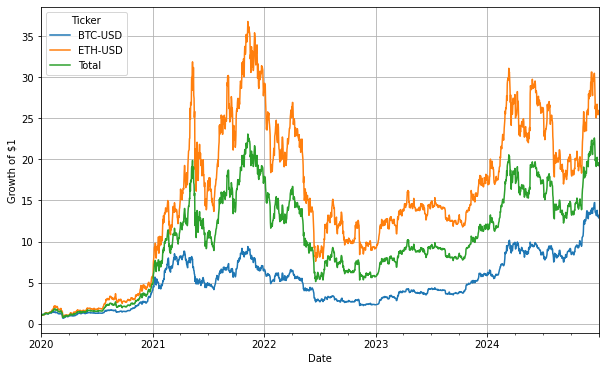

In [17]:
(cumulative_returns
 .plot(figsize=(10,6),
       ylabel='Growth of $1',
       grid=True)
)

<AxesSubplot:xlabel='Date', ylabel='Volatility (Annualized)'>

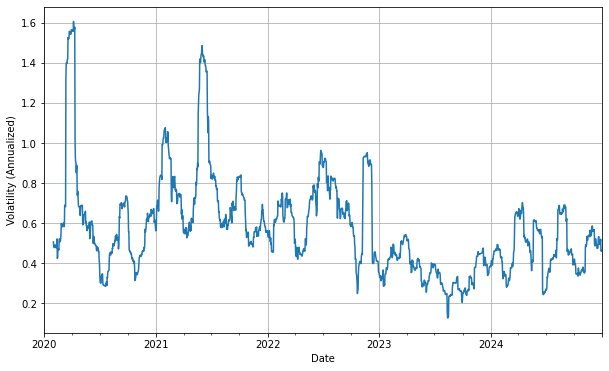

In [18]:
(rolling_volatility
 .plot(figsize=(10,6),
       ylabel='Volatility (Annualized)',
       grid=True)
)

<AxesSubplot:xlabel='Date'>

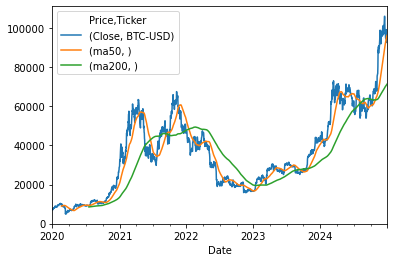

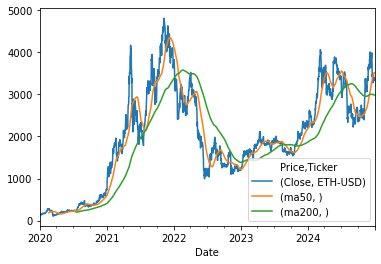

In [37]:
# Choose only the Bitcoin columns
btc = (data
       .iloc[:, ::2]
        )

# Choose only the Ethereum columns
eth = (data
       .iloc[:, 1::2]
        )

# Computes and plots moving averages for Bitcoin
(btc
 .assign(
         ma50=btc.Close.rolling(50).mean(),
         ma200=btc.Close.rolling(200).mean(),
         
        )
 [['Close', 'ma50', 'ma200']]
 .plot()
)

# Computes and plots moving averages for Ethereum
(eth
 .assign(
         ma50=eth.Close.rolling(50).mean(),
         ma200=eth.Close.rolling(200).mean(),
         
        )
 [['Close', 'ma50', 'ma200']]
 .plot()
)

<AxesSubplot:xlabel='Date'>

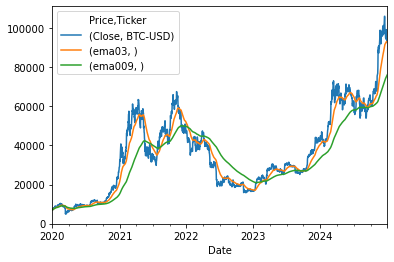

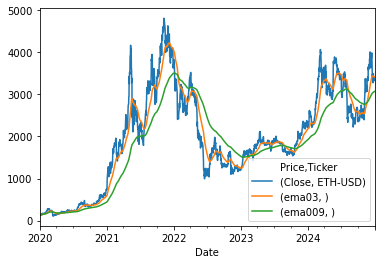

In [38]:
# Plots exponential moving averages for Bitcoin
(btc
 .assign(
         ema03=btc.Close.ewm(alpha=0.0392).mean(),
         ema009=btc.Close.ewm(alpha=0.00995).mean(),
         
        )
 [['Close', 'ema03', 'ema009']]
 .plot()
)

# Plots exponential moving averages for Ethereum
(eth
 .assign(
         ema03=eth.Close.ewm(alpha=0.0392).mean(),
         ema009=eth.Close.ewm(alpha=0.00995).mean(),
         
        )
 [['Close', 'ema03', 'ema009']]
 .plot()
)